In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds #loading datasets

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os

In [ ]:
image_path = '/content/stale banana.png'
image_raw = tf.io.read_file(image_path) #to read the file
image = tf.image.decode_png(image_raw, channels=3) #to decode the image and ensuring RBG

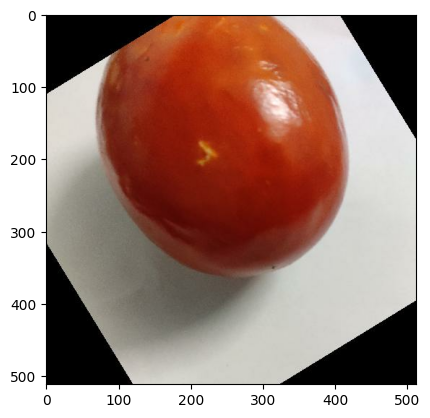

In [ ]:

plt.imshow(image.numpy())
plt.show()

In [ ]:

image_shape = image.shape
print(image_shape)

(428, 652, 3)


In [ ]:
image = tf.image.resize(image, [128, 128]) #resizing to match model input here
image = image/255.0 #normalizing pixel value (0-1)->because kernal is 255
image = tf.expand_dims(image, axis=0) #batch dimension adding

In [ ]:
#SPECIFICATIONS FOR AUGMENTED IMAGES REQUIRED
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, validation_split=0.2, horizontal_flip=True, fill_mode='nearest')
augmented_images = datagen.flow(image, batch_size=1)


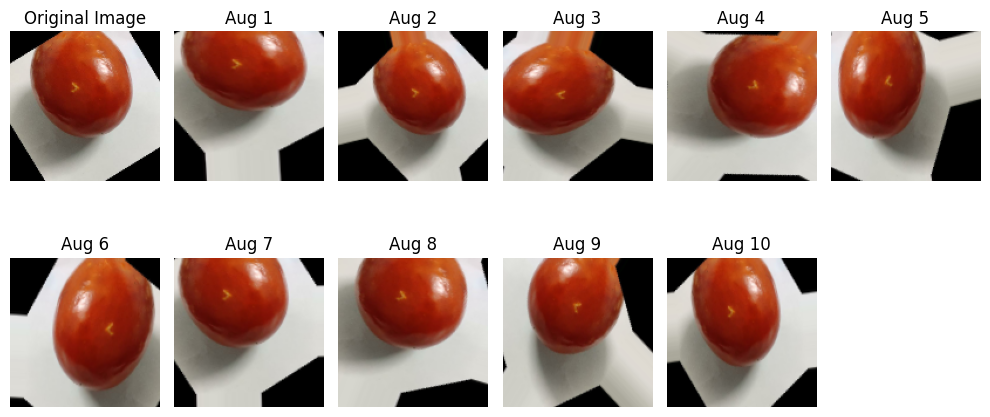

In [ ]:
#TO DISPLAY AUGMENTED IMAGES
augmented_images = [next(datagen.flow(image, batch_size=1))[0] for _ in range(10)]

# Plot original and augmented images
plt.figure(figsize=(10, 5))
plt.subplot(2, 6, 1)
plt.imshow(image[0])
plt.title("Original Image")
plt.axis("off")

for i, aug_img in enumerate(augmented_images):
    plt.subplot(2, 6, i + 2)
    plt.imshow(aug_img)
    plt.title(f"Aug {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
#SETTING PATH FOR ALL THESE IMAGES IN DATASET
dataset_path = "/content/dataset/" #set path for images
train_path = os.path.join(dataset_path, "train/stale/") #created path for storing training images
val_path = os.path.join(dataset_path, "val/stale/") #storing validation images here
os.makedirs(train_path, exist_ok=True) #creates folder if it is not exist
os.makedirs(val_path, exist_ok=True)

In [ ]:
num_train = 80
num_val = 20

In [ ]:
#
for i in range(num_train):
  #image, batch_size=1-> created batch of augmented images
  #next()-> takes one augment imge from batch, [0]-> to start from first image
    aug_img = next(datagen.flow(image, batch_size=1))[0]
    aug_img = (aug_img * 255).astype(np.uint8)
    #ImageDataGenerator-> outputs images with pixel values between 0 and 1.
    #np.uint8-> to ensure that pixel values are whole numbers.
    save_path = os.path.join(train_path, f"stale_aug_{i+1}.png")
    cv2.imwrite(save_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)) #RGB to BGR beacuse OpenCV expects BGR image formats

for i in range(num_val):
    aug_img = next(datagen.flow(image, batch_size=1))[0]
    aug_img = (aug_img * 255).astype(np.uint8)
    save_path = os.path.join(val_path, f"stale_aug_{i+1}.png")
    cv2.imwrite(save_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))

print(f"✅ Augmented dataset created with {num_train} and {num_val} images.")

✅ Augmented dataset created with 80 and 20 images.


In [ ]:
#PARAMETERS
image_size= (128, 128)
batch_size= 16

In [ ]:
#LOADING DATASET USING IMAGEDATAGENERATOR
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#LOAD TRAIN AND VALIDATION DATASETS
train_data = train_datagen.flow_from_directory("/content/dataset/train/", target_size=image_size, batch_size=batch_size, class_mode="binary")
val_data = train_datagen.flow_from_directory("/content/dataset/val/", target_size=image_size, batch_size=batch_size, class_mode="binary")

Found 80 images belonging to 1 classes.
Found 20 images belonging to 1 classes.


In [ ]:
######CNN
random.seed(0)
model = models.Sequential()
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1))

In [ ]:
######
lr = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
######
epochs=10
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  verbose=1
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 

In [ ]:
model.save("/content/stale_fruit_classifier.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


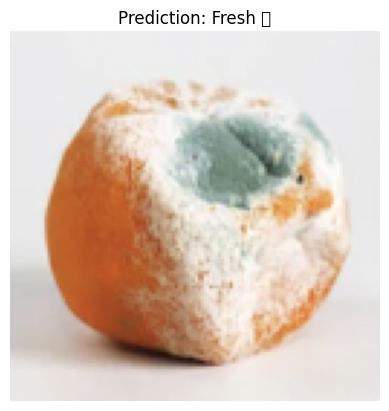

In [ ]:
'''
# Load trained model
model = tf.keras.models.load_model("/content/stale_fruit_classifier.h5")

In [ ]:
'''
# Load test image
test_image_path = "/content/stale orange.png"  # Change this to your new image
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (128, 128))
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)


In [ ]:
'''
# Predict
prediction = model.predict(test_image)[0][0]
label = "Stale 🍌" if prediction > 0.5 else "Fresh 🍏"

In [ ]:
'''# Show result
plt.imshow(test_image[0])
plt.title(f"Prediction: {label}")
plt.axis("off")
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Load MobileNetV2 model (pre-trained on ImageNet)
base_model = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


In [ ]:
# Freeze the base model
base_model.trainable = False

In [ ]:
# Add custom classification layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Binary classification (fresh/stale)
])

In [ ]:
# Load the single image
image_path = "/content/stale banana.png"  # Update the path
image = cv2.imread(image_path)  # Read the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
image = cv2.resize(image, (224, 224))  # Resize to match model input size
image = image / 255.0  # Normalize
image = np.expand_dims(image, axis=0)  # Add batch dimension


In [ ]:
# Make prediction
prediction = model.predict(image)[0][0]  # Get probability


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


In [ ]:

# Interpret the result
label = "Fresh Fruit 🍌" if prediction > 0.5 else "Stale Fruit 🍏"
confidence = prediction if prediction > 0.5 else 1 - prediction


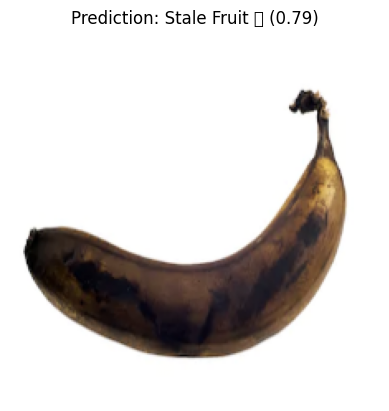

In [ ]:
# Show the image and result
plt.imshow(image[0])
plt.title(f"Prediction: {label} ({confidence:.2f})")
plt.axis("off")
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))  # Resize to match CNN input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [ ]:
random.seed(0)

In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),  # Rescaling input
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
'''image_shape = image.shape
print(image_shape)'''

'image_shape = image.shape\nprint(image_shape)'

In [ ]:
image_path = "/content/stale orange.png"
test_image = preprocess_image(image_path)
plt.show()

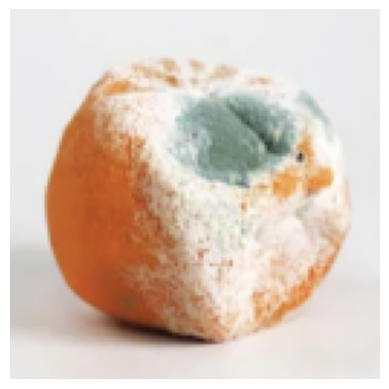

In [ ]:
plt.imshow(test_image[0])
plt.axis("off")
plt.show()

In [ ]:
features = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
prediction = model.predict(test_image)[0][0]  # Get single value
binary_output = 1 if prediction >= 0.5 else 0  # Thresholding

# Print binary output
print(f"🔹 Model Output: {binary_output}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
🔹 Model Output: 1
